### Testeo de scipy
Cacharreo con la función para aprender su funcionamiento

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

##### Ejemplo 1 de Burden
Parece estar correcto. Usan método RK4 en el libro, solve:idp usa RK45, pero no parece haber diferencias muuy significativas

Debemos definir una función que contenga el sistema de ecuaciones que queremos resolver, en este caso ejemplo(t,y), donde t es la variable independiente, y y se entiende como un vector de ecuaciones que contiene a $y_1,y_2,...,y_m$, y devuelve las funciones componente $f_1 (t,y) , ... , f_m (t,y)$

solve_ivp recibe el sistema definido por la función, intervalo donde solucionar, el vector con valores iniciales, el método que se quiere usar para resolver el problema y un diccionario con los puntos donde queramos solucionar el sistema

/home/dicarvajalg/miniforge3/lib/python3.12/site-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `mehotd`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] [[-0.4        -0.46172914 -0.52540313 -0.58848717 -0.64675622 -0.69383778
  -0.72121189 -0.71807602 -0.66962016 -0.55640914 -0.3533203 ]
 [-0.6        -0.6316222  -0.63976238 -0.61327819 -0.53669309 -0.38916889
  -0.14450572  0.22908897  0.77208659  1.53477311  2.57880634]]


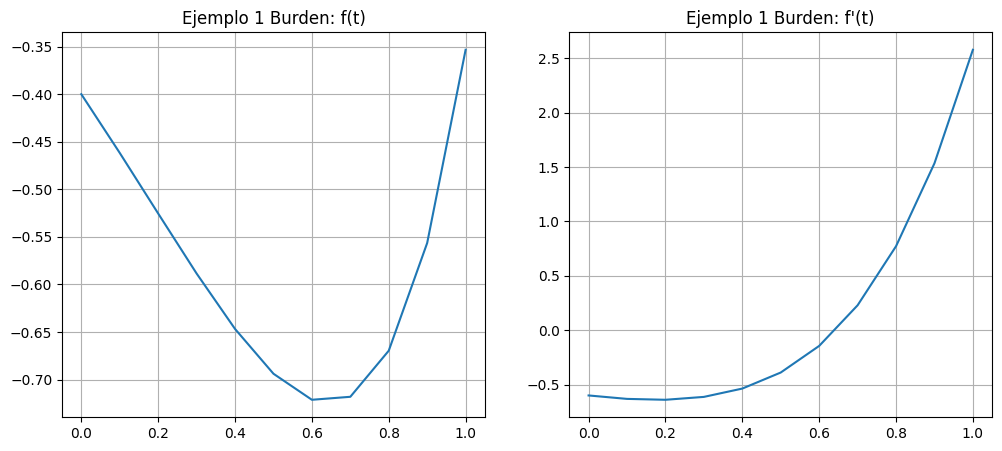

In [ ]:
def ejemplo(t,y):
    """ 
    dy1 /dt = y2
    dy2/dt = exp(2t)sin(t) - 2 y1(t) + 2y2(t)
    """
    return [
         y[1],
         np.e ** (2*t) * np.sin(t) - 2*y[0] + 2*y[1]
            ]

sol = solve_ivp(
        ejemplo, #Sistema a resolver
        [0,1], #Intervalo donde resolver
        [-0.4,-0.6], #Valores iniciales
        mehotd = 'RK45', #Método de solución
        t_eval = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] #Puntos a resolver
    )

print(sol.t,sol.y)
plt.figure(figsize=(12,5)) #Figura de solución
plt.subplot(121)
plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], sol.y[0], label='t')
plt.title('Ejemplo 1 Burden: f(t)')
plt.grid(True)

plt.subplot(122) #Figura de derivada de solución
plt.plot([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], sol.y[1], label='t')
plt.title("Ejemplo 1 Burden: f'(t)")
plt.grid(True)